# The Iris Dataset

A play by play analysis of this simple dataset.

## Data Reading and preprocessing

In [57]:
import pandas as pd

In [58]:
data = pd.read_csv("iris.data", sep=",")
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [59]:
data.shape

(149, 5)

In [60]:
data.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [61]:
data.dtypes

5.1            float64
3.5            float64
1.4            float64
0.2            float64
Iris-setosa     object
dtype: object

In [62]:
#Create a copy of the dataset
df = data.copy()


In [63]:
df.isna().any()

5.1            False
3.5            False
1.4            False
0.2            False
Iris-setosa    False
dtype: bool

In [64]:
df.head(10)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [66]:
df["Iris-setosa"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Iris-setosa, dtype: int64

In [67]:
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [68]:
df.describe(include=['O'])

,Iris-setosa
count,149
unique,3
top,Iris-versicolor
freq,50


In [69]:
#Renaming columns
new_columns = {'5.1': 'sepal_length', '3.5': 'sepal_width', '1.4':'petal_length','0.2':'petal_width','Iris-setosa':'species'}
df.rename(columns=new_columns, inplace=True)


## Data analysis
A graphical overview of the different features

In [70]:
import matplotlib.pyplot as plt

In [71]:
#For the numerical variables
#A univariae analysis

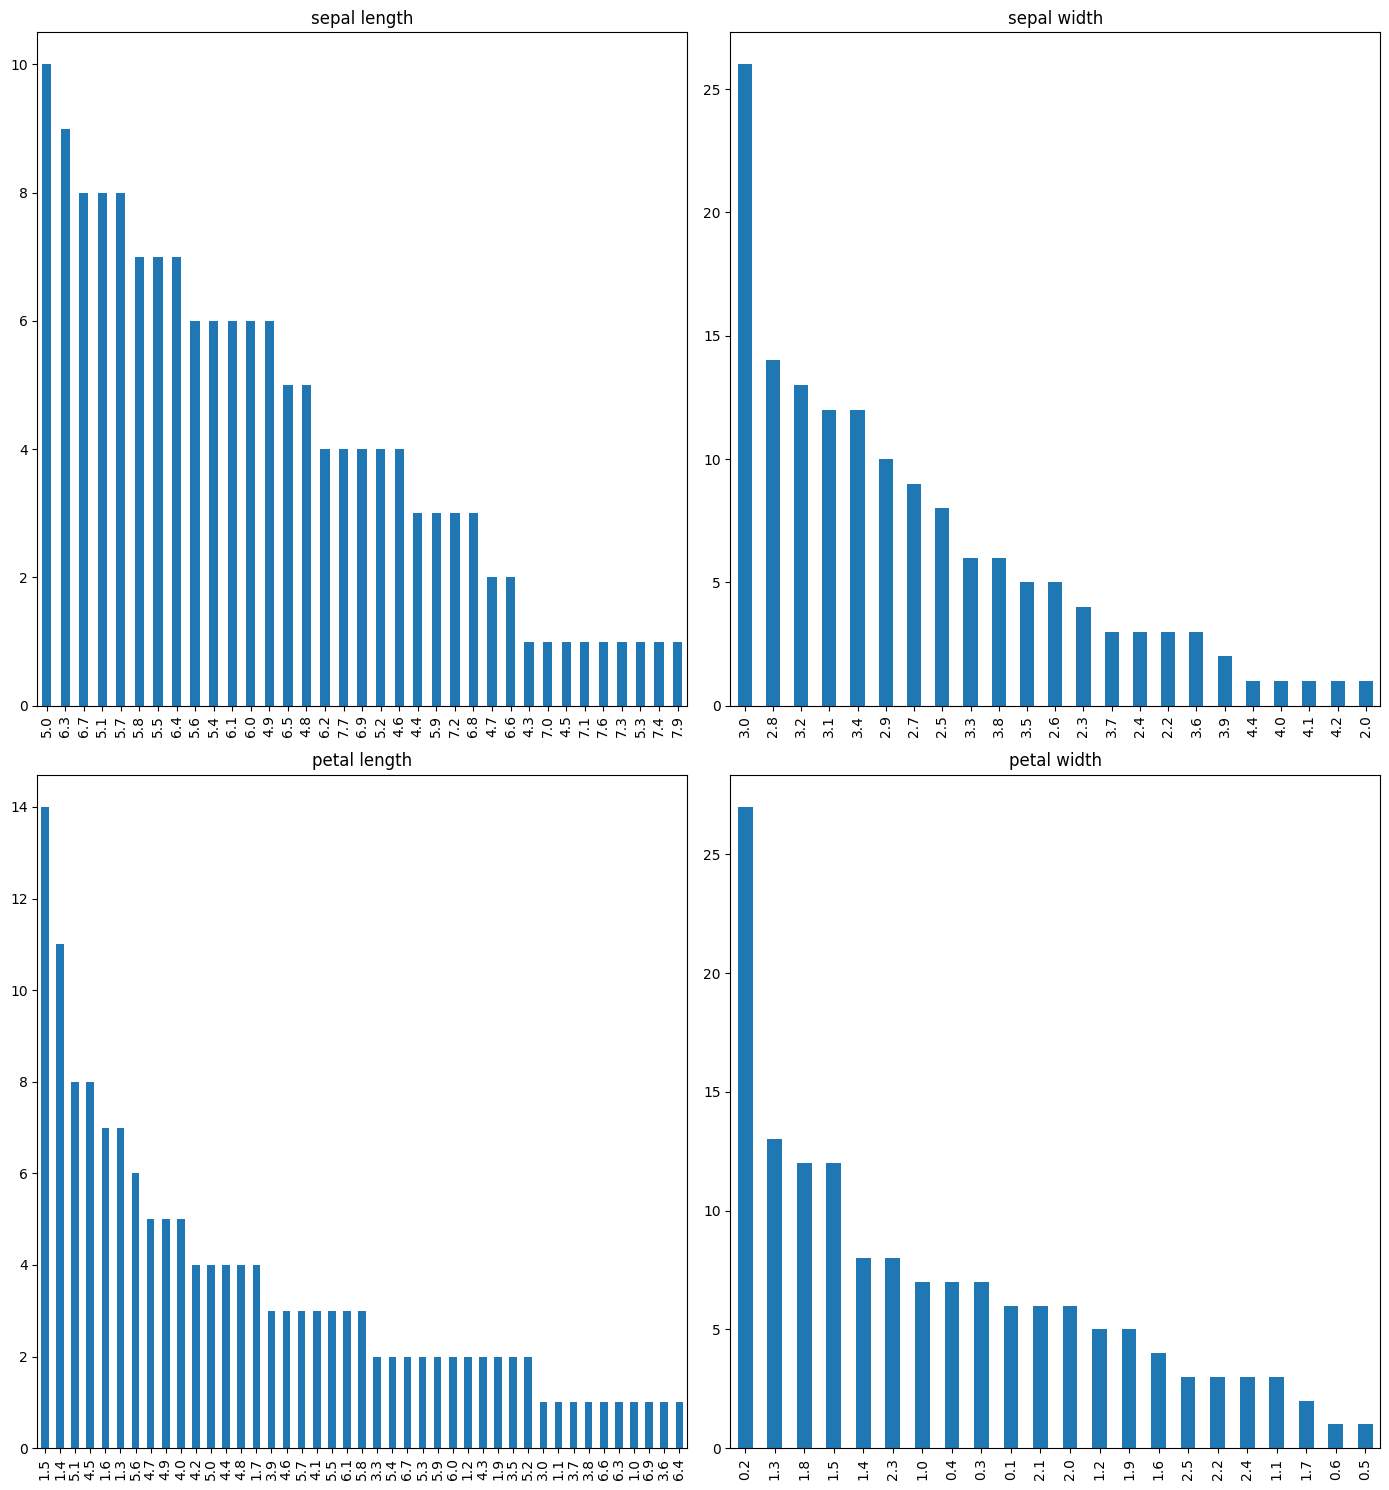

In [72]:
plt.figure(figsize=(14, 15))

#5.1
plt.subplot(221)
df["sepal_length"].value_counts().plot(kind='bar', title='sepal length')

#3.5
plt.subplot(222)
df["sepal_width"].value_counts().plot(kind='bar', title='sepal width')

#1.4
plt.subplot(223)
df["petal_length"].value_counts().plot(kind='bar', title='petal length')

#0.2
plt.subplot(224)
df["petal_width"].value_counts().plot(kind='bar', title='petal width')

plt.tight_layout()

<AxesSubplot: title={'center': 'Species'}>

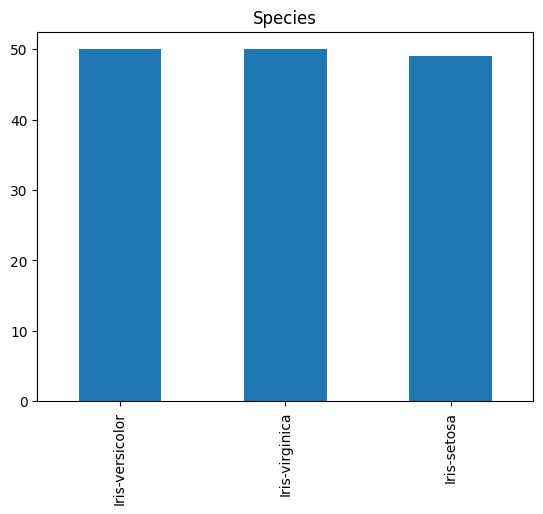

In [73]:
# For the categorical variable
df["species"].value_counts().plot(kind='bar', title='Species')


In [74]:
#Bivariate analysis
import seaborn as sns

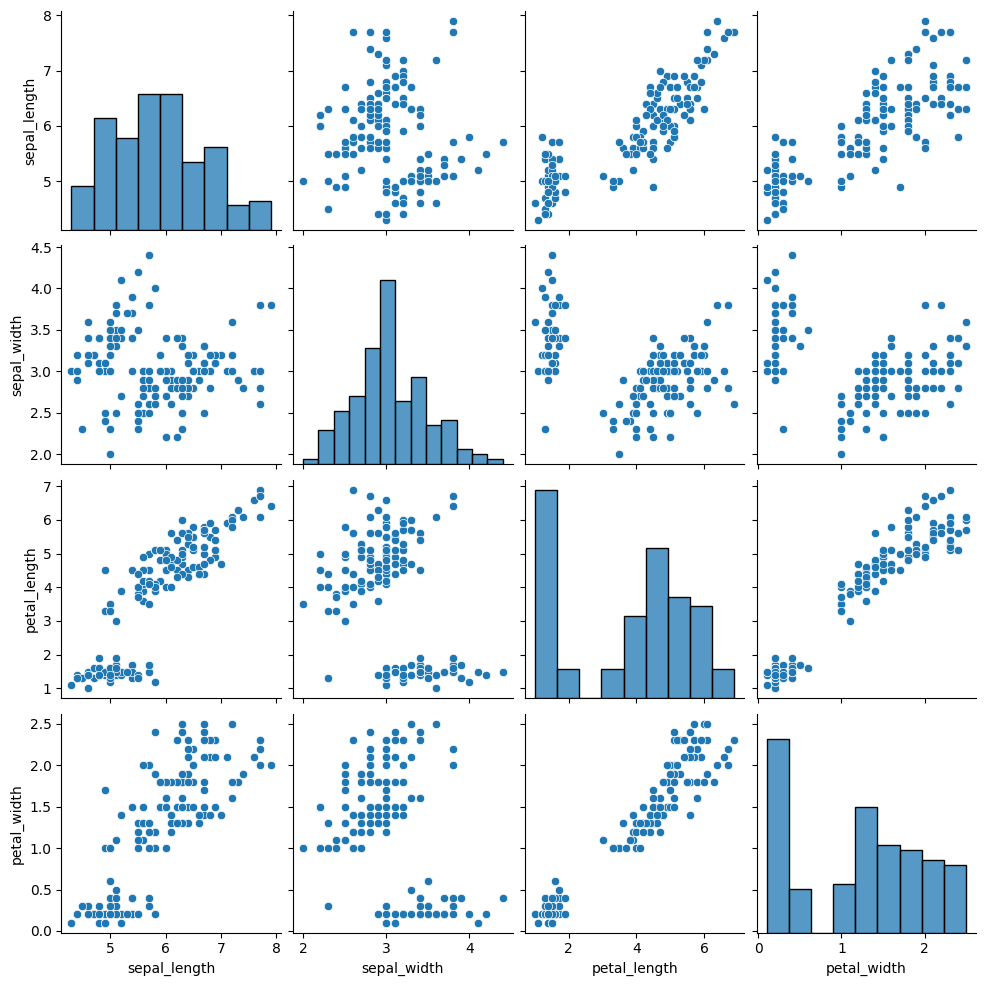

In [75]:
#Pairplot
sns.pairplot(df)

In [76]:
#Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.103784      0.871283     0.816971
sepal_width      -0.103784     1.000000     -0.415218    -0.350733
petal_length      0.871283    -0.415218      1.000000     0.962314
petal_width       0.816971    -0.350733      0.962314     1.000000


C:\Users\rizaa\AppData\Local\Temp\ipykernel_21816\4083961646.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [77]:
#Convert categorical data to numerical data
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["species"] = encoder.fit_transform(df["species"])

In [78]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int32
dtype: object

In [79]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [80]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2
148,5.9,3.0,5.1,1.8,2


## Modelling


In [87]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [88]:
#X is our feature matrix, y our label(target) variable / array
X = df.drop('species', axis=1)
y = df['species']

#Split df into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
svc = SVC(kernel='linear')
random_forest = RandomForestClassifier()
grad_boost = GradientBoostingClassifier()

#train the models
svc.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
grad_boost.fit(X_train, y_train)


GradientBoostingClassifier()

In [90]:
#Make the predictions
svc_pred = svc.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
grad_boost_pred = grad_boost.predict(X_test)


In [93]:
#Check the accuracy of each model
print(f"{'SVC accuracy'} : {accuracy_score(y_test, svc_pred)}")
print(f"{'Random Forest accuracy'} : {accuracy_score(y_test, random_forest_pred)}")
print(f"{'GBoost accuracy'} : {accuracy_score(y_test, grad_boost_pred)}")

SVC accuracy : 0.9333333333333333
Random Forest accuracy : 0.9
GBoost accuracy : 0.9
